In [69]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
#ShapeFile : https://github.com/geohacker/kerala
districts_gdf = gpd.read_file('/Users/aaronjoju/Documents/AdvancePython/Unit2/kerala-master/shapefiles/district.shp')
districts_gdf.head(5)

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,orig_ogc_f,geometry
0,Alappuzha,Kerala,32,11,598,7,"POLYGON ((76.37334 9.83565, 76.37955 9.82888, ..."
1,Ernakulam,Kerala,32,8,595,173,"POLYGON ((76.68924 10.26721, 76.68724 10.26170..."
2,Idukki,Kerala,32,9,596,232,"POLYGON ((77.28895 10.22973, 77.29462 10.21643..."
3,Kannur,Kerala,32,2,589,277,"POLYGON ((75.46997 12.30049, 75.48558 12.29131..."
4,Kasaragod,Kerala,32,1,588,288,"POLYGON ((75.41667 12.50166, 75.42240 12.48463..."


In [71]:
# https://dashboard.kerala.gov.in/covid/daily.php
covid_data = pd.read_csv('COVID19.csv')

covid_df = pd.DataFrame(covid_data)
covid_df

,District,Confirmed,Recovered,Active,Death
0,Ernakulam,942032,926106,2566,8526
1,Thiruvananthapuram,754705,744806,1739,8645
2,Thrissur,685065,679073,815,7560
3,Kozhikode,684600,681140,154,6469
4,Malappuram,651330,646693,262,6480
5,Kollam,528398,523662,400,6655
6,Kottayam,475156,470395,1175,4670
7,Palakkad,456523,447170,467,5817
8,Alappuzha,401742,398515,457,5272
9,Kannur,352701,348670,74,4479


In [72]:
merged_df = districts_gdf.merge(covid_data, how='left', left_on='DISTRICT', right_on='District')

merged_df['Death'] = merged_df['Death'].fillna(0)
merged_df['Confirmed'] = merged_df['Confirmed'].fillna(0)
merged_df['Recovered'] = merged_df['Recovered'].fillna(0)
merged_df['Active'] = merged_df['Active'].fillna(0)

/var/folders/p5/ck_2rv1n3rn6dwp8yldw0z7w0000gn/T/ipykernel_7845/3648252339.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_df.geometry.centroid.x, merged_df.geometry.centroid.y, merged_df['DISTRICT']):


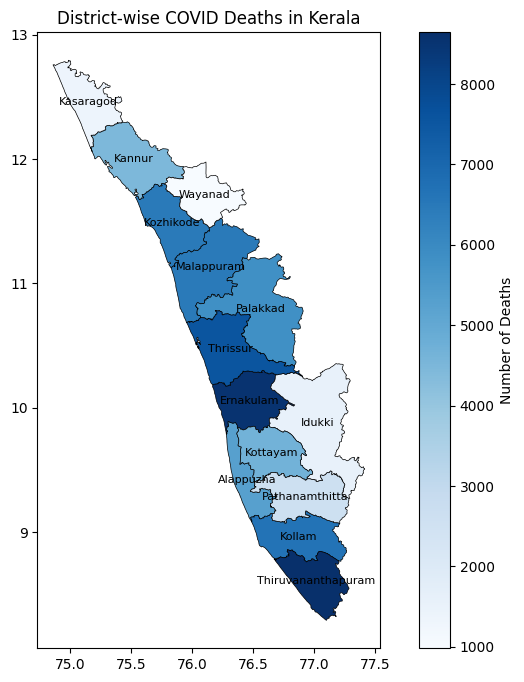

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.set_title('District-wise COVID Deaths in Kerala')

merged_df.plot(ax=ax, column='Death', cmap='Blues', legend=True, legend_kwds={'label': 'Number of Deaths'}, edgecolor='black', linewidth=0.5)

for x, y, label in zip(merged_df.geometry.centroid.x, merged_df.geometry.centroid.y, merged_df['DISTRICT']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

plt.show()

/var/folders/p5/ck_2rv1n3rn6dwp8yldw0z7w0000gn/T/ipykernel_7845/1363694838.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_df.geometry.centroid.x, merged_df.geometry.centroid.y, merged_df['DISTRICT']):


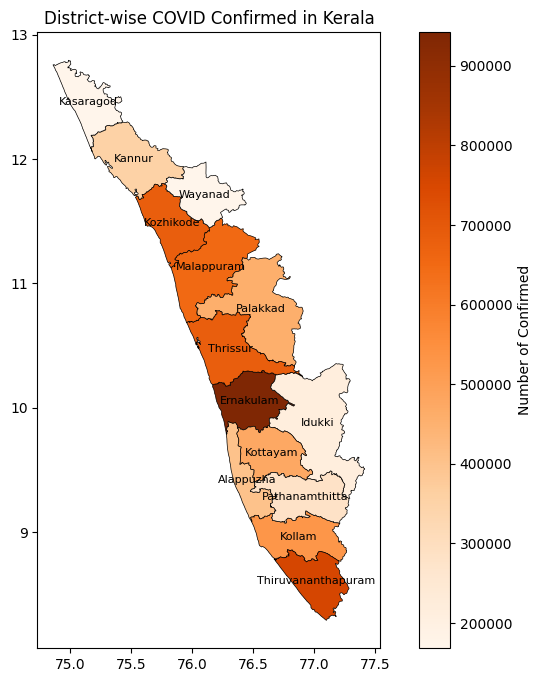

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.set_title('District-wise COVID Confirmed in Kerala')

merged_df.plot(ax=ax, column='Confirmed', cmap='Oranges', legend=True, legend_kwds={'label': 'Number of Confirmed'}, edgecolor='black', linewidth=0.5)

for x, y, label in zip(merged_df.geometry.centroid.x, merged_df.geometry.centroid.y, merged_df['DISTRICT']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

plt.show()